In [1]:
import util
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import os

## Generate dataset
___

In [2]:
################# DIRECTORIES AND PATHS #####################
CURRENT_DIR = os.path.abspath(os.path.dirname('__file__'))
ROOT_DIR = os.path.abspath(os.path.dirname(CURRENT_DIR))
RECIPE_DIR = os.path.abspath(os.path.join(ROOT_DIR, 'Recipe_Requests'))
ING_CODE_PATH = os.path.abspath(os.path.join(RECIPE_DIR, 'ingred_decode.csv'))
ING_DATA_PATH = os.path.abspath(os.path.join(RECIPE_DIR, 'recipes_encoded.csv' ))

In [3]:
dat_df = pd.read_csv(ING_DATA_PATH, skipinitialspace=True)

In [6]:
# dat = util._generate_binary_samples(1000, 10, seed=True, seed_val=42)
# dat_df = pd.DataFrame(dat)

## Correlation matrix of the dataset
___

In [ ]:
# util._plot_correlation(dat_df)

## Bartlett and KMO tests

In [4]:
util._bartlett(dat_df)

Bartlett test results: 
statistics: inf
p-value: nan
Null hypothesis could not be rejected. No statistical significance for collinearity.


C:\Users\KC Cheng\.conda\envs\tf-gpu\lib\site-packages\factor_analyzer\factor_analyzer.py:118: RuntimeWarning: divide by zero encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)
C:\Users\KC Cheng\.conda\envs\tf-gpu\lib\site-packages\scipy\stats\_continuous_distns.py:1266: RuntimeWarning: invalid value encountered in subtract
  return sc.xlogy(df/2.-1, x) - x/2. - sc.gammaln(df/2.) - (np.log(2)*df)/2.


In [5]:
util._kmo(dat_df)

C:\Users\KC Cheng\.conda\envs\tf-gpu\lib\site-packages\factor_analyzer\utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


KMO test results: 
statistics: 0.25
Sampling is insufficient for factor analysis.


## Standardize dataset
___

In [6]:
dat_std = StandardScaler().fit_transform(dat_df)

## Perform PCA
___

In [7]:
n_components = len(dat_std[0, :])
pca = PCA(n_components).fit(dat_std)
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_
dat_transformed = pca.transform(dat_std)

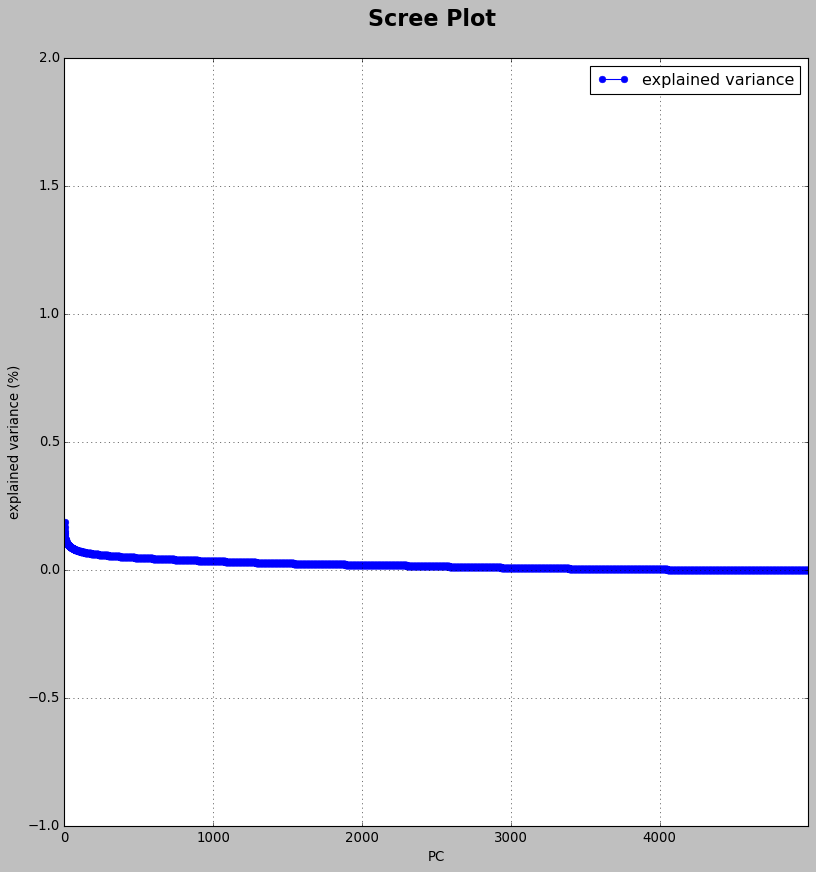

In [8]:
# get scree plot
util._plot_scree(eigenvalues)

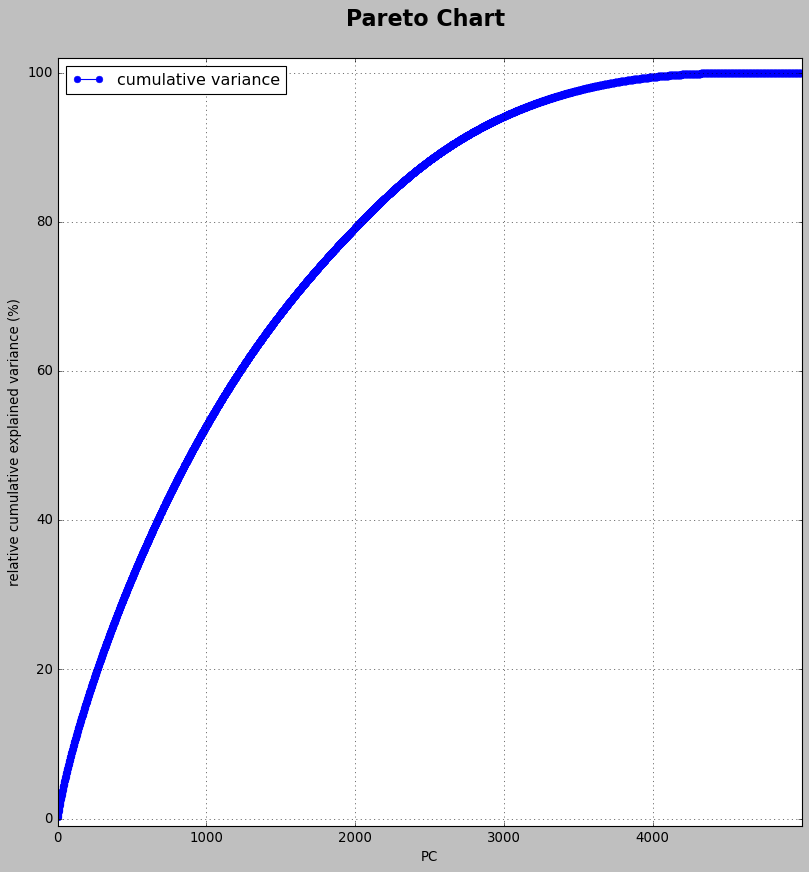

In [9]:
# get Pareto plot
util._plot_pareto(eigenvalues)

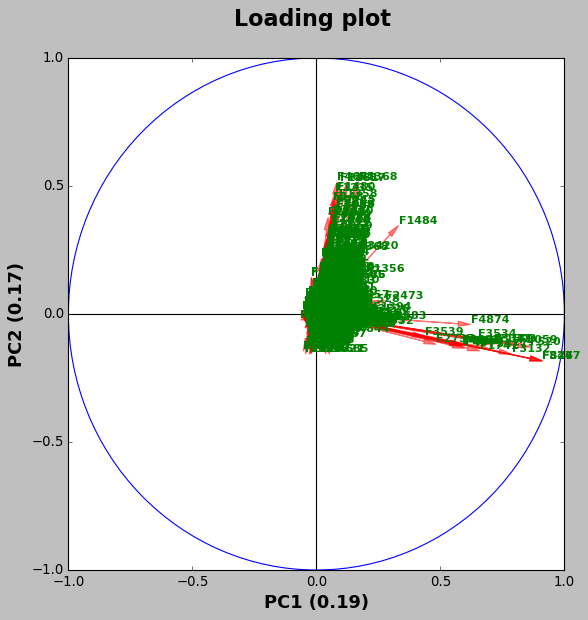

In [10]:
# plot loadings plot
util._plot_loading(eigenvalues, eigenvectors)

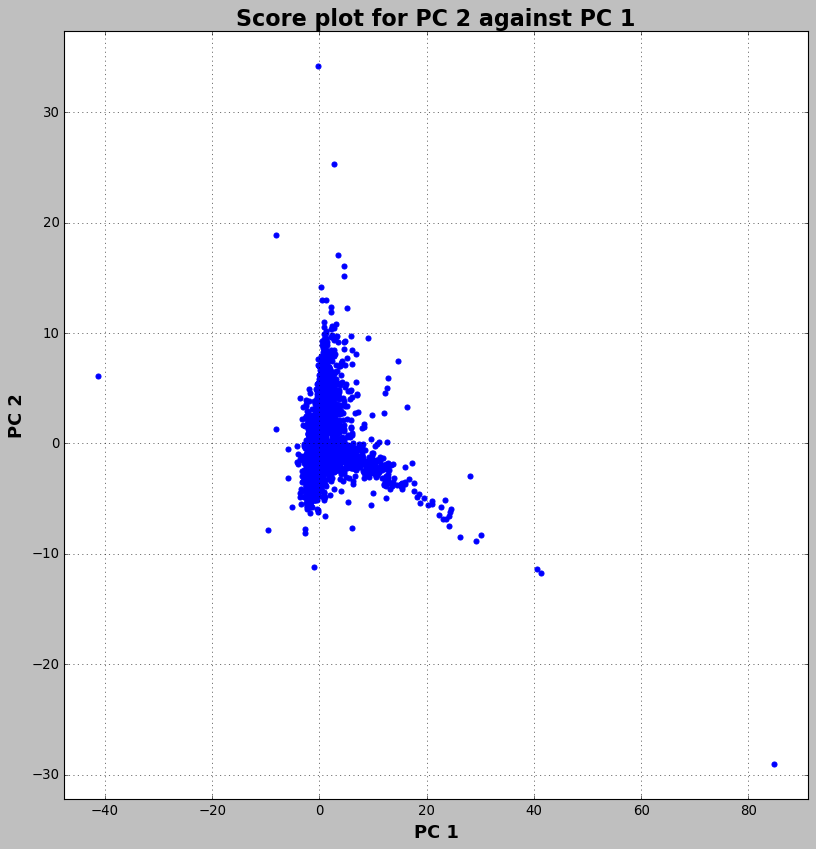

In [24]:
# plot score plot
util._plot_score(dat_transformed, 1, 2)

## Reduce dataset
___

In [17]:
dat_reduced = dat_transformed[:, 0:2000]

## Find optimal cluster number k-mean clustering

Cluster number, k =  2
MSSE score:  3955.168
Silhouette score:  0.591
Cluster number, k =  3
MSSE score:  3952.759
Silhouette score:  0.164
Cluster number, k =  4
MSSE score:  3950.149
Silhouette score:  0.164
Cluster number, k =  5
MSSE score:  3946.133
Silhouette score:  -0.026
Cluster number, k =  6
MSSE score:  3943.306
Silhouette score:  -0.026
Cluster number, k =  7
MSSE score:  3940.272
Silhouette score:  -0.026
Cluster number, k =  8
MSSE score:  3937.243
Silhouette score:  -0.065
Cluster number, k =  9
MSSE score:  3934.768
Silhouette score:  0.074
Cluster number, k =  10
MSSE score:  3932.004
Silhouette score:  0.291
Cluster number, k =  11
MSSE score:  3927.562
Silhouette score:  0.032
Cluster number, k =  12
MSSE score:  3924.373
Silhouette score:  -0.064
Cluster number, k =  13
MSSE score:  3918.667
Silhouette score:  -0.062
Cluster number, k =  14
MSSE score:  3916.751
Silhouette score:  0.063
Cluster number, k =  15
MSSE score:  3914.001
Silhouette score:  -0.062
Cluster

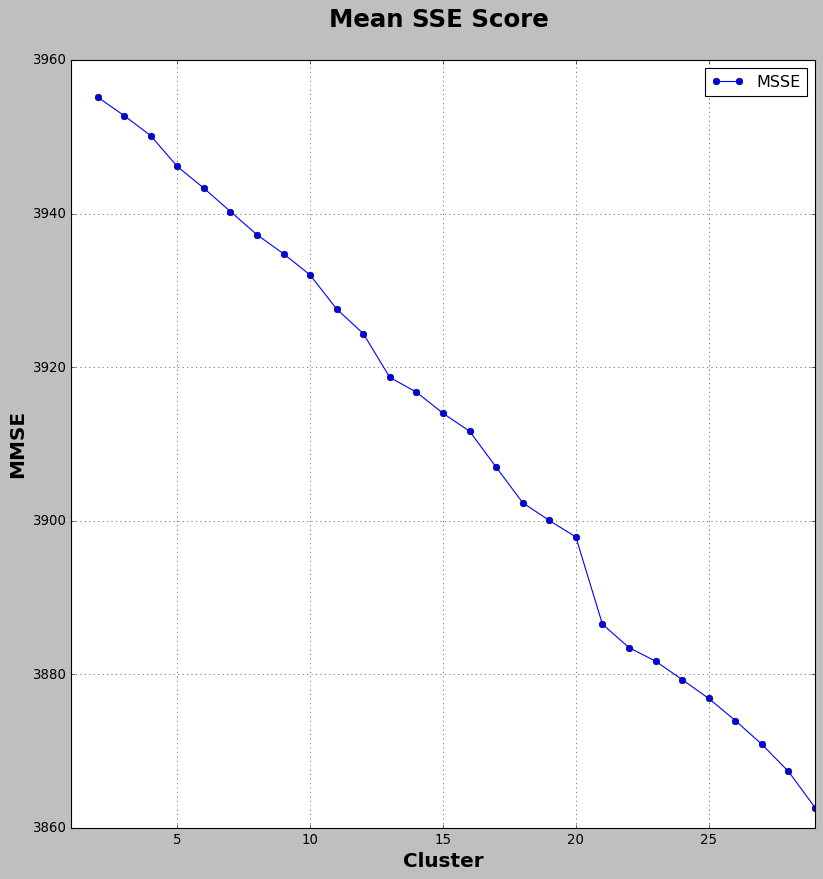

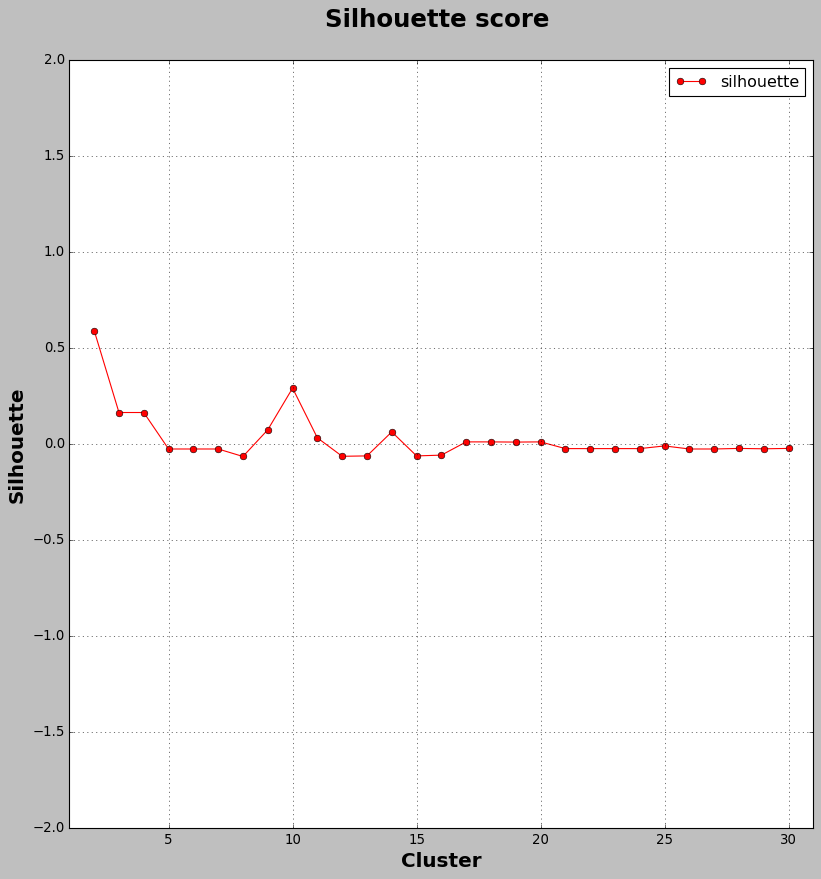

In [19]:
MSSE, silhouette = util._perform_kmean(dat_reduced, min=2, max=30)

## Fit k-mean clustering to data

In [25]:
kmeans = KMeans(n_clusters=10, init='k-means++', n_init=10,
               max_iter=500, random_state=42)
kmeans.fit(dat_reduced)

KMeans(max_iter=500, n_clusters=10, random_state=42)

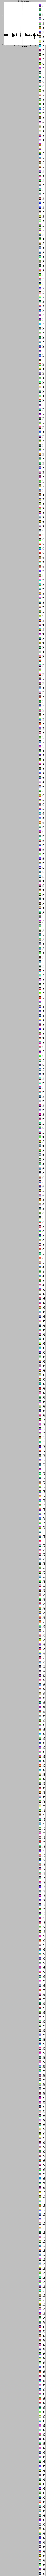

In [26]:
centroids = kmeans.cluster_centers_
util._plot_cluster_centroid(centroids)